## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 5.8: Plot Planck dust continuum vs HI4PI to show gas-to-dust correlation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import random
%matplotlib inline

In [33]:
def dust_vs_gas(im1, im2, subsample=-1):
    fig = plt.figure(figsize=(8,5.5))
    ax = fig.add_subplot(111)

    x = im1.flatten()
    y = im2.flatten()
    
    if subsample < 0:
        plt.plot(x, y, 'k.', alpha=0.1, ms=4, mew=0)
    else:
        N = x.size
        random_select = random.sample(range(N), int(N/subsample))
        plt.plot(x[random_select], y[random_select], 'k.', alpha=0.1, ms=4, mew=0)

    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlim(3e23,3e26)
    ax.set_ylim(0.1,1000)
    ax.set_xlabel(r'$N_{HI}$ [m$^{-2}$]', fontsize=20)
    ax.set_ylabel(r'$I_{857 GHz}$ [MJy/Sr]', fontsize=20)
    ax.tick_params(labelsize=16)

    # plot a linear relation for comparison
    R = 6.
    xlin = np.array([4e23, 2e26])
    ylin = R * xlin/1e25
    plt.plot(xlin, ylin, 'k--', lw=2)

    plt.show()

In [38]:
hdu = fits.open('HI_allsky.fits')
im1 = hdu[0].data
hd1 = hdu[0].header
# convert from cm-2 to m-2
im1 *= 1e4
hdu.close()

hdu = fits.open('planck857_allsky.fits')
im2 = hdu[0].data
hd2 = hdu[0].header
hdu.close()

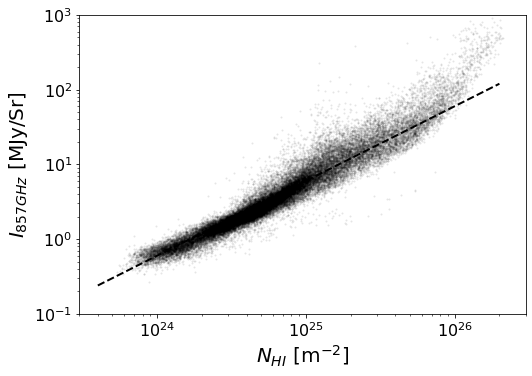

In [39]:
dust_vs_gas(im1, im2, subsample=-1)